In [1]:
%reload_ext autoreload
%autoreload 2

# How to use

In [6]:
from qiskit_qec.circuits import RepetitionCodeCircuit
from qiskit import transpile

from result_saver import SaverProvider
from soft_info import get_repcode_layout

provider = SaverProvider()
backend = provider.get_backend('ibm_sherbrooke')

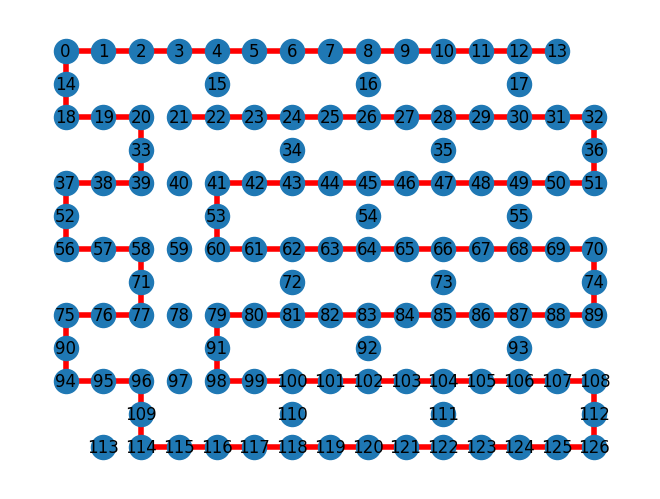

([13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 14, 18, 19, 20, 33, 39, 38, 37, 52, 56, 57, 58, 71, 77, 76, 75, 90, 94, 95, 96, 109, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 112, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 91, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 74, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 53, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 36, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21], 21, 109)


TypeError: unhashable type: 'list'

In [8]:
# Code Params
distance = 2
rounds = 5
logical = '0'

code = RepetitionCodeCircuit(distance, rounds, xbasis=False, barriers=False)
qc = code.circuit[logical]

layout = get_repcode_layout(distance, backend, _is_hex=True)
print(layout)

transpiled_circut = transpile(qc, backend, initial_layout=layout, optimization_level=3)
transpiled_circut.draw(fold=-1)

In [11]:
path = [1,2, 3, 4, 5, 6, 7, 8, 9]
distance = 2
bounded_path = path[:2 * distance - 1]
layout = bounded_path[1::2] + bounded_path[::2] 

layout

[2, 1, 3]

# Transpile rep code

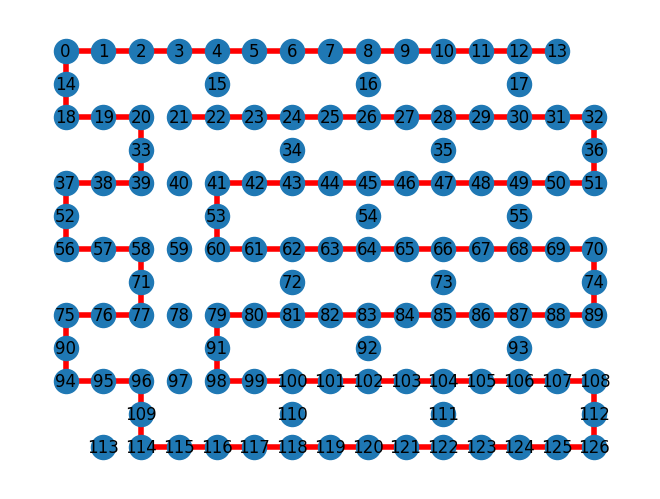

[12, 10, 13, 11, 9]


In [8]:
def separate_qubits(path, distance):
    """Separate a list of qubits into code qubits and link qubits, limited by a maximum distance.
    
    Args:
        path (list): A list of qubits constituting a path.
        distance (int): The maximum number of code qubits.
        
    Returns:
        list: A list containing two lists: the first list consists of code qubits, 
              and the second list consists of link qubits.
              
    Raises:
        ValueError: If the distance is too large for the given path.
    """
    if distance * 2 - 1 > len(path):
        raise ValueError(f"The distance: {distance} is larger than the max distance: {int((len(path)+1)/2)} for the given path of length: {len(path)}")
    
    code_qubits = path[:distance * 2:2]
    link_qubits = path[1:distance * 2 - 1:2]
    layout = []
    layout.extend(link_qubits)
    layout.extend(code_qubits)
    return layout

# Example usage
path = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
distance = 3

path, _, _ = find_longest_path_in_hex(backend, True)
layout = separate_qubits(path, distance)

print(layout)


# RepCode testing

In [18]:
from qiskit_qec.circuits import ArcCircuit, RepetitionCodeCircuit

code = RepetitionCodeCircuit(d=3, T=4, barriers=False)
qc = code.circuit['1']
qc.draw(fold=-1)

┌───┐     ┌───┐     ┌─┐   ┌───┐     ┌───┐     ┌─┐   ┌───┐     ┌───┐     ┌─┐   ┌───┐     ┌───┐        ┌─┐         
      link_qubit_0: ─────┤ X ├─────┤ X ├─────┤M├───┤ X ├─────┤ X ├─────┤M├───┤ X ├─────┤ X ├─────┤M├───┤ X ├─────┤ X ├────────┤M├─────────
                         └─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐└─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐└─┬─┘┌───┐└─┬─┘┌───┐└╥┘┌─┐└─┬─┘┌───┐└─┬─┘┌───┐   └╥┘┌─┐      
      link_qubit_1: ───────┼──┤ X ├──┼──┤ X ├─╫─┤M├──┼──┤ X ├──┼──┤ X ├─╫─┤M├──┼──┤ X ├──┼──┤ X ├─╫─┤M├──┼──┤ X ├──┼──┤ X ├────╫─┤M├──────
                    ┌───┐  │  └─┬─┘  │  └─┬─┘ ║ └╥┘  │  └─┬─┘  │  └─┬─┘ ║ └╥┘  │  └─┬─┘  │  └─┬─┘ ║ └╥┘  │  └─┬─┘  │  └─┬─┘┌─┐ ║ └╥┘      
      code_qubit_0: ┤ X ├──■────┼────┼────┼───╫──╫───■────┼────┼────┼───╫──╫───■────┼────┼────┼───╫──╫───■────┼────┼────┼──┤M├─╫──╫───────
                    ├───┤       │    │    │   ║  ║        │    │    │   ║  ║        │    │    │   ║  ║        │    │    │  └╥┘ ║  ║ ┌─┐   
      code_qubit_1: ┤ X ├───────■────■────┼───╫──╫────────■────■────┼───╫──╫────────■────■────┼───╫──╫────────■────■────┼───╫──╫──╫─┤M├───
                    ├───┤                 │   ║  ║                  │   ║  ║                  │   ║  ║                  │   ║  ║  ║ └╥┘┌─┐
      code_qubit_2: ┤ X ├─────────────────■───╫──╫──────────────────■───╫──╫──────────────────■───╫──╫──────────────────■───╫──╫──╫──╫─┤M├
                    └───┘                     ║  ║                      ║  ║                      ║  ║                      ║  ║  ║  ║ └╥┘
round_0_link_bit: 2/══════════════════════════╩══╩══════════════════════╬══╬══════════════════════╬══╬══════════════════════╬══╬══╬══╬══╬═
                                              0  1                      ║  ║                      ║  ║                      ║  ║  ║  ║  ║ 
round_1_link_bit: 2/════════════════════════════════════════════════════╩══╩══════════════════════╬══╬══════════════════════╬══╬══╬══╬══╬═
                                                                        0  1                      ║  ║                      ║  ║  ║  ║  ║ 
round_2_link_bit: 2/══════════════════════════════════════════════════════════════════════════════╩══╩══════════════════════╬══╬══╬══╬══╬═
                                                                                                  0  1                      ║  ║  ║  ║  ║ 
round_3_link_bit: 2/════════════════════════════════════════════════════════════════════════════════════════════════════════╬══╩══╩══╬══╬═
                                                                                                                            ║  0  1  ║  ║ 
        code_bit: 3/════════════════════════════════════════════════════════════════════════════════════════════════════════╩════════╩══╩═
                                                                                                                            0        1  2

In [19]:
qc.qubits
# layout = ['link_qubit', 'code_qubit'] 
# transpiled_qc = transpile(qc, backend, initial_layout=initial_layout) #* virtual to physical: [0, 3, 5]

[Qubit(QuantumRegister(2, 'link_qubit'), 0),
 Qubit(QuantumRegister(2, 'link_qubit'), 1),
 Qubit(QuantumRegister(3, 'code_qubit'), 0),
 Qubit(QuantumRegister(3, 'code_qubit'), 1),
 Qubit(QuantumRegister(3, 'code_qubit'), 2)]